In [1]:
#import neccesary libararies
import pyforest


In [2]:
#loading te data
data=pd.read_csv("craigslist_vehicles.csv")
data.head()

<IPython.core.display.Javascript object>

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,removal_date
0,362773,7307679724,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00
1,362712,7311833696,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00
2,362722,7311441996,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4900,2006.0,toyota,camry,excellent,...,sedan,silver,https://images.craigslist.org/00808_5FkOw2aGjA...,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,NaN,tx,32.453848,-99.787900,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00
3,362771,7307680715,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-04-26 00:00:00+00:00
4,362710,7311834578,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-05-12 00:00:00+00:00


In [3]:
#getting the shape of the date
data.shape

(426880, 28)

In [4]:
#getting then statistical summary
data.describe()

,Unnamed: 0,id,price,year,odometer,county,lat,long
count,426880.000000,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,213439.500000,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,123229.785793,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,0.000000,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,106719.750000,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,213439.500000,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,320159.250000,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,426879.000000,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


# data cleaning

In [5]:
#dropping unnecesary columns
cols_drop = ['Unnamed: 0','url','image_url', 'county', 'region_url', 'paint_color','size', 'drive', 'VIN']
data.drop(data[cols_drop], axis=1, inplace=True)

In [6]:
#getting the column names
data.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'type',
       'description', 'state', 'lat', 'long', 'posting_date', 'removal_date'],
      dtype='object')

In [7]:
data.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
type             92858
description         70
state                0
lat               6549
long              6549
posting_date        68
removal_date        68
dtype: int64

In [8]:
data.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,type,description,state,lat,long,posting_date,removal_date
426875,7307070484,zanesville / cambridge,5100,2009.0,NaN,saab 9-7x,fair,6 cylinders,gas,106000.0,clean,automatic,SUV,For sale: 2009 Saab 9-7x Fair condition AWD ...,oh,39.937000,-82.031500,2021-04-15 00:00:00+00:00,2021-04-21 00:00:00+00:00
426876,7314635557,zanesville / cambridge,7500,2011.0,ford,f-450,good,NaN,gas,177886.0,clean,automatic,bus,"2011 E-Ford 450 with 177k miles, 6.8 liter v-1...",oh,39.927400,-82.004100,2021-04-30 00:00:00+00:00,2021-05-15 00:00:00+00:00
426877,7314710341,zanesville / cambridge,25000,2016.0,chevrolet,silverado,excellent,8 cylinders,other,78850.0,clean,automatic,truck,2013 Silverado excellent condition. Blue in co...,oh,39.896865,-82.042283,2021-04-30 00:00:00+00:00,2021-05-12 00:00:00+00:00
426878,7316225330,zanesville / cambridge,6,1986.0,NaN,camaro iroc z28,good,NaN,gas,86500.0,clean,automatic,NaN,"1986 Iroc Z28 , T-tops , 86,500 miles , has ne...",oh,39.938630,-82.006760,2021-05-03 00:00:00+00:00,2021-05-08 00:00:00+00:00
426879,7308192431,zanesville / cambridge,9795,1999.0,dodge,durango,like new,8 cylinders,gas,74000.0,clean,automatic,SUV,"FOR SALE LIKE NEW 1999 DODGE DURANGO, LOADED W...",oh,39.998337,-82.022885,2021-04-17 00:00:00+00:00,2021-05-09 00:00:00+00:00


In [9]:
#filling the missing values
def fill_missing(df):
    # Separate columns by data type (numeric and object)
    numeric_features = []
    categorical_features = []

    for i in df.columns:
        if df[i].dtype == 'object':
            categorical_features.append(i)
        else:
            numeric_features.append(i)

    # Fill missing values in numeric columns with the median
    df[numeric_features] = df[numeric_features].fillna(df[numeric_features].median())

    # Fill missing values in object columns with the mode
    df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode().iloc[0])


    return df
data = fill_missing(data)

In [11]:
data.isna().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
type            0
description     0
state           0
lat             0
long            0
posting_date    0
removal_date    0
dtype: int64

In [12]:
#converting the date to datetime   type and making it the index of the data.
data.posting_date = pd.to_datetime(data.posting_date)
data.set_index('posting_date', inplace=True)

<IPython.core.display.Javascript object>

In [13]:
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,type,description,state,lat,long,removal_date
posting_date,,,,,,,,,,,,,,,,,,
2021-04-16 00:00:00+00:00,7307679724,abilene,4500,2002.0,bmw,x5,good,6 cylinders,gas,184000.0,clean,automatic,sedan,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",tx,32.401556,-99.884713,2021-05-02 00:00:00+00:00
2021-04-24 00:00:00+00:00,7311833696,abilene,4500,2002.0,bmw,x5,good,6 cylinders,gas,184000.0,clean,automatic,sedan,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",tx,32.401556,-99.884713,2021-04-28 00:00:00+00:00
2021-04-23 00:00:00+00:00,7311441996,abilene,4900,2006.0,toyota,camry,excellent,4 cylinders,gas,184930.0,clean,automatic,sedan,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,tx,32.453848,-99.787900,2021-05-25 00:00:00+00:00
2021-04-16 00:00:00+00:00,7307680715,abilene,6500,2008.0,ford,expedition,good,6 cylinders,gas,206000.0,clean,automatic,sedan,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,tx,32.401556,-99.884713,2021-04-26 00:00:00+00:00
2021-04-24 00:00:00+00:00,7311834578,abilene,6500,2008.0,ford,expedition,good,6 cylinders,gas,206000.0,clean,automatic,sedan,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,tx,32.401556,-99.884713,2021-05-12 00:00:00+00:00


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 426880 entries, 2021-04-16 00:00:00+00:00 to 2021-04-17 00:00:00+00:00
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          426880 non-null  float64
 4   manufacturer  426880 non-null  object 
 5   model         426880 non-null  object 
 6   condition     426880 non-null  object 
 7   cylinders     426880 non-null  object 
 8   fuel          426880 non-null  object 
 9   odometer      426880 non-null  float64
 10  title_status  426880 non-null  object 
 11  transmission  426880 non-null  object 
 12  type          426880 non-null  object 
 13  description   426880 non-null  object 
 14  state         426880 non-null  object 
 15  lat           426880 non-null  float64
 16  long          426880 non-null  float64
 17  re

# data exploration

In [ ]:
#data exploration
plt.figure(figsize=(16,5))
fig=plt.figure(1)
ax1=fig.add_subplot(111)
ax1.set_xlabel('day')
ax1.set_ylabel('Price')
ax1.plot(df.price)


In [15]:
average_price = data['price'].resample('D').mean()
average_price.head()

posting_date
2021-04-04 00:00:00+00:00     23120.747228
2021-04-05 00:00:00+00:00     42300.160571
2021-04-06 00:00:00+00:00    544212.541373
2021-04-07 00:00:00+00:00     35742.916852
2021-04-08 00:00:00+00:00     19072.463539
Freq: D, Name: price, dtype: float64

# checking the stationarity using rolling statistics

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

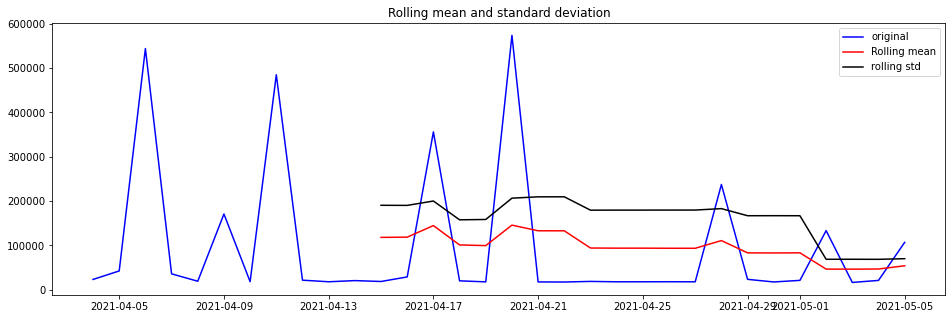

In [16]:
#determining the rolling statistics
rollmean=average_price.rolling(12).mean()
rollstd=average_price.rolling(12).std()

plt.figure(figsize=(16,5))
fig=plt.figure(1)

#ploting the rolling statistics
original=plt.plot(average_price,color='blue',label='original')
mean=plt.plot(rollmean,color='red',label='Rolling mean')
std=plt.plot(rollstd,color='black',label='rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation')
plt.show(block=False)


# getting the components of  time series model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

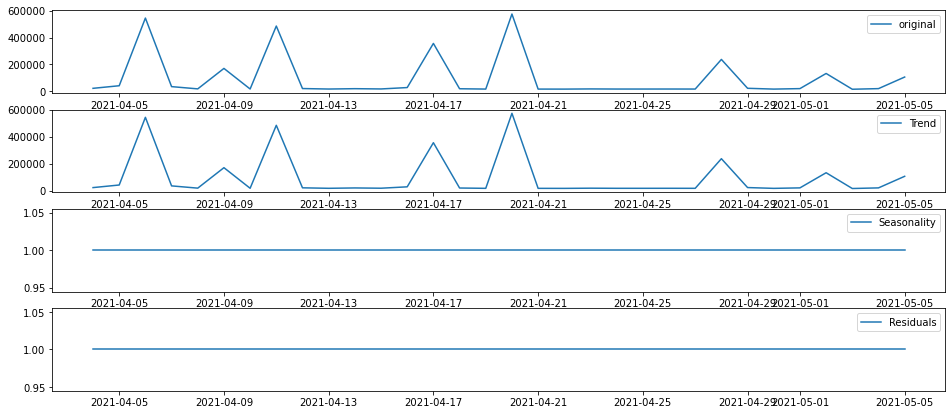

In [17]:
#decomposition
import warnings
warnings.simplefilter("ignore")
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(average_price,freq=1, model='multiplicative')

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.figure(figsize=(16,7))
fig=plt.figure(1)

plt.subplot(411)
plt.plot(average_price,label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

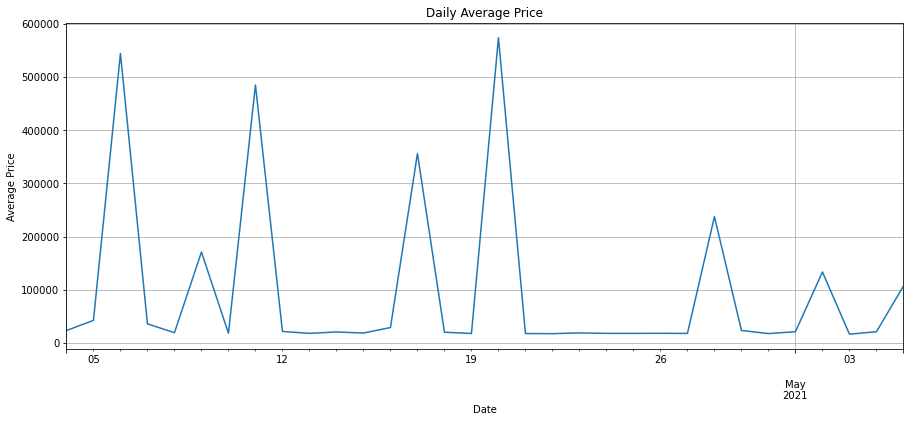

In [18]:

plt.figure(figsize=(15, 6))
average_price.plot()
plt.title('Daily Average Price')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()